### First ML Program
Source: [Machine learning mastery](https://machinelearningmastery.com/machine-learning-in-python-step-by-step/)

Mind Map: [Link](https://coggle.it/diagram/XcLjIK5A3SekDH7d/t/machine-learning-project-steps/0081912f4bc5e267fd660c091cce1b3b6ac9d84a64d17858a0a91c94499ddcd8)

## Steps
1. Load Data
2. Sumarise Data
3. Visualize data
4. Evaluate Algorithms
5. Predictions
6. Present result

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

/home/stallians/Study/Projects/venv/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/stallians/Study/Projects/venv/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [26]:
from pandas.plotting import scatter_matrix

In [59]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Load Data

In [3]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv'

In [6]:
columns = ['sepal_length', 'sepal_width','petal_length', 'petal_width', 'species']

In [14]:
dset = pd.read_csv(url)

## Sumarise Data

In [15]:
dset.shape

(150, 5)

In [16]:
dset.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
dset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [30]:
dset.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

## Visualizing Data

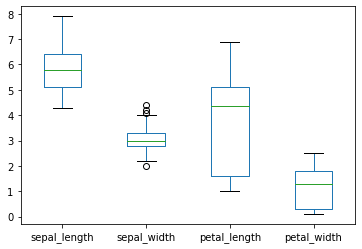

In [23]:
dset.plot(kind='box')
plt.show()

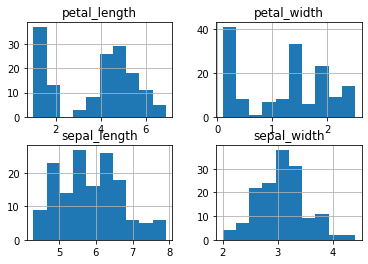

In [25]:
dset.hist()
plt.show()

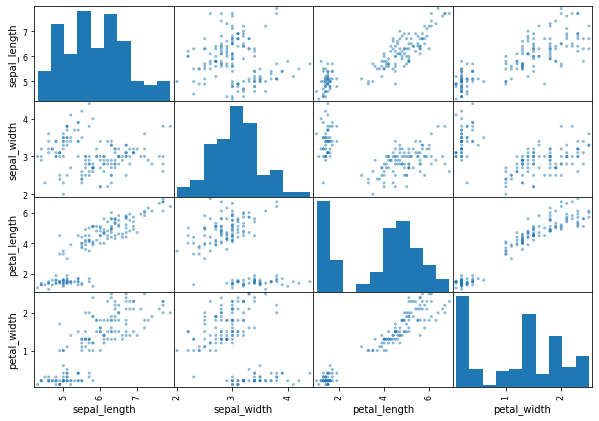

In [29]:
scatter_matrix(dset, figsize=(10,7))
plt.show()

## Evaluating Algorithms

### Making validation split

In [ ]:
array = dset.values

In [32]:
X = array[:,0:4]
Y = array[:,4]

In [33]:
validation_split = 0.20
seed = 20

In [55]:
X_train, X_valid, Y_train, Y_valid = model_selection.train_test_split(X,Y,test_size=validation_split, random_state=seed)

In [37]:
assert X_train.shape[1] == 4
assert X_test.shape[1] == 4

In [49]:
# algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto')))

In [51]:
results = []
names= []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    scores = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(scores)
    names.append(name)
    print(f"{name:3}: {scores.mean():2.5f} ({scores.std():2.3f})")

LR : 0.95833 (0.042)
LDA: 0.97500 (0.038)
KNN: 0.95833 (0.042)
NB : 0.95833 (0.067)
DTC: 0.95833 (0.056)
SVM: 0.97500 (0.038)


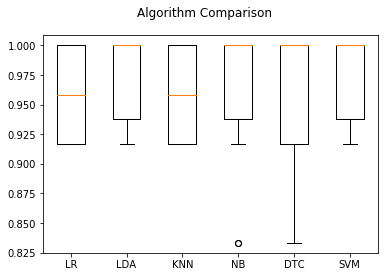

In [53]:
# compare algorithms
fig = plt.figure()
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Make Predictions

In [60]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
predictions = lda.predict(X_valid)
# score = lda.score(Y_valid, predictions)
print(accuracy_score(Y_valid, predictions))
print(confusion_matrix(Y_valid, predictions))
print(classification_report(Y_valid, predictions))

0.9666666666666667
[[ 8  0  0]
 [ 0 11  0]
 [ 0  1 10]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.92      1.00      0.96        11
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

